<a href="https://colab.research.google.com/github/Abtin-Ghorbani/AppliedAI_FashionMNIST/blob/main/AppliedAI_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load data and chek the labels and columns**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**import libraries**

In [3]:
# basic tools for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**load data sand start analyzing**

In [4]:
import pandas as pd
train_path = "/content/drive/MyDrive/Applied AI_FashionMNIST_data/fashion-mnist_train.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv("/content/drive/MyDrive/Applied AI_FashionMNIST_data/fashion-mnist_test.csv")
df_train.head() #first 5 for train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()# first 5 in test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**chek the labels for CW requirement**

In [6]:
df_train['label'].head(10)

,label
0,2
1,9
2,6
3,0
4,3
5,4
6,4
7,5
8,4
9,8


In [7]:
df_test['label'].value_counts()

,count
label,
0,1000
1,1000
2,1000
3,1000
8,1000
6,1000
5,1000
4,1000
7,1000


# **Task1)Data Pre-processing and Visualisation**

**1.1Check shape and column names**\

In [9]:
print(f"Shape of training data: {df_train.shape}")# number of columns and rows
print(f"Columns: {df_train.columns[:10]} ...")# column names

Shape of training data: (60000, 785)
Columns: Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9'],
      dtype='object') ...


**find unique values for label column in train and test data**

In [10]:
df_train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [11]:
df_test['label'].unique()

array([0, 1, 2, 3, 8, 6, 5, 4, 7, 9])

**1.2 Check for missing values for both train test**

In [12]:
# Check for missing values
missing_values = df_train.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 0


In [13]:
df_test.isnull().sum().sum() #missing values for test data
print(f"Total missing values for test: {missing_values}")

Total missing values for test: 0


**1.3 chek outlier(we need all the pixcels so they are not outlier just abnormally)**

In [14]:
high_pixel_count = (df_train> 250).sum().sum()#count how many pixels have very high intensity
print(f"Number of pixels with intensity > 250: {high_pixel_count}")


Number of pixels with intensity > 250: 582125


**1.4Check label distribution**

<ipython-input-15-41d4772d1386>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette='Set2')


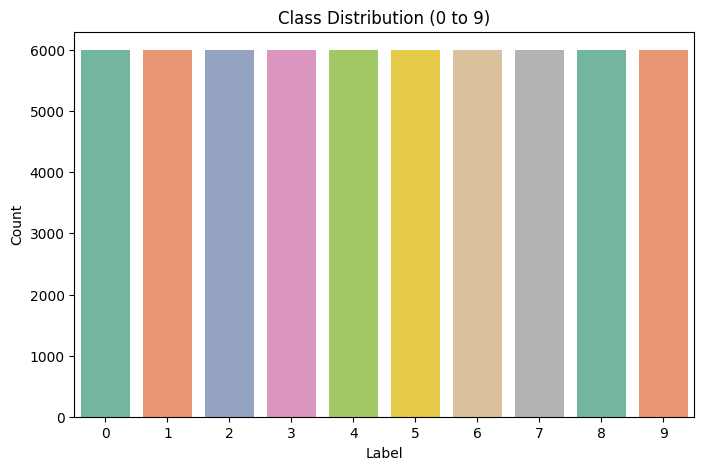

In [15]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df_train, palette='Set2') #color set 2
plt.title("Class Distribution (0 to 9)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

<ipython-input-17-391a683ebae1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_test, palette='viridis')


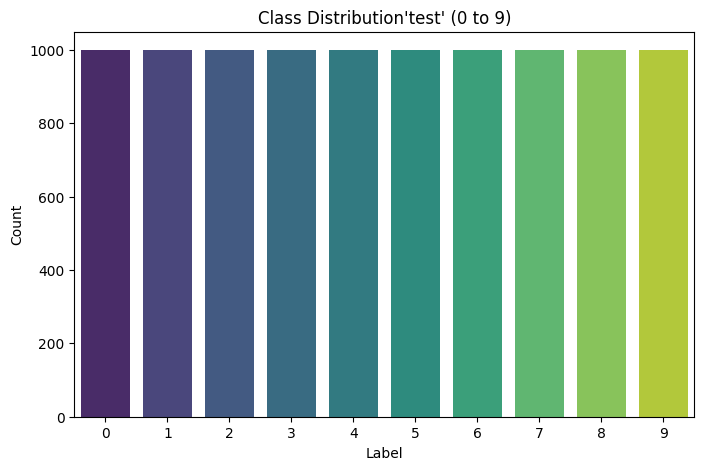

In [17]:
# Visualize class distribution for test datda
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df_test, palette='viridis') #color virdis
plt.title("Class Distribution'test' (0 to 9)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

**1.5 Separate Xtraun ytrain features and labels for other task **bold text**

In [18]:
y_train = df_train["label"]
X_train_df = df_train.drop("label", axis=1)
y_test = df_test["label"]
X_test_df = df_test.drop("label", axis=1)

**1.6 Normalizing data to 0-1 with minmaxscalar**

In [19]:
from sklearn.preprocessing import MinMaxScaler
# ساخت اسکیلر و نرمال‌سازی X_train
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_df)

# نرمال‌سازی X_test با همون
X_test_scaled = scaler.transform(X_test_df)


**1.7 chek normalization**

In [20]:
print(f"Train features shape: {X_train_scaled.shape}")
print(f"Test features shape: {X_test_scaled.shape}")
print(f"Train label shape: {y_train.shape}")
print(f"Test label shape: {y_test.shape}")

Train features shape: (60000, 784)
Test features shape: (10000, 784)
Train label shape: (60000,)
Test label shape: (10000,)


**1.8  Sample Images from Normalized Training and Test Data**

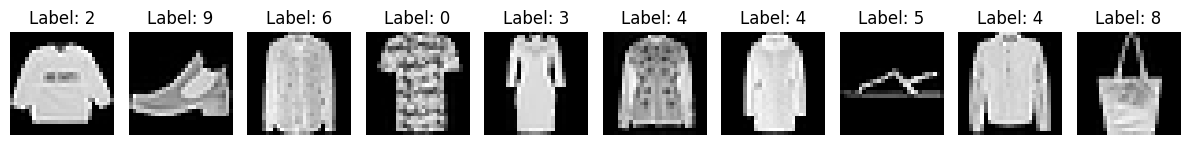

In [21]:
# Define the function to plot images from scaled data
def plot_images(data, labels, n=10): # first 10 pics
    plt.figure(figsize=(12, 2))
    for i in range(n):
        image = data[i].reshape(28, 28) #reshape them
        plt.subplot(1, n, i+1) #plot the normalized pics
        plt.imshow(image, cmap='gray')# color gray
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
# Example usage for train images
plot_images(X_train_scaled, y_train.values)

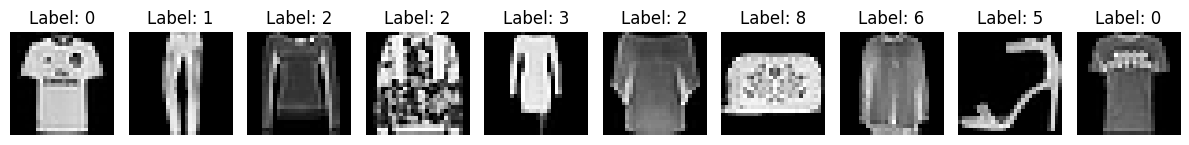

In [22]:
# Define the function to plot images from scaled data
def plot_images(data, labels, n=10):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        image = data[i].reshape(28, 28)
        plt.subplot(1, n, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
# Example usage for test images #first 10
plot_images(X_test_scaled, y_test.values)

** 1.9Boxplot of Pixel Intensity (Pixel 120) Across all Classes**

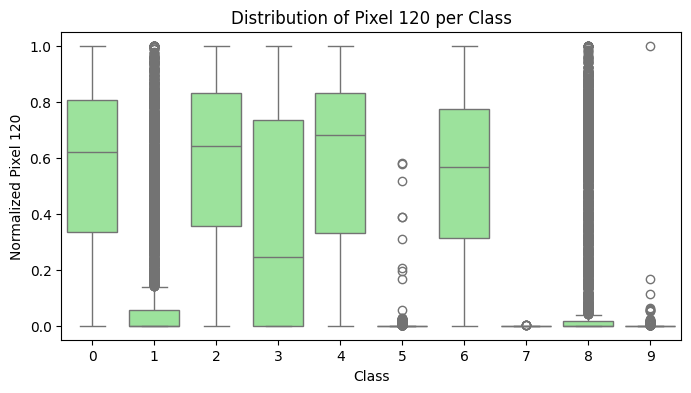

In [31]:
df_vis = pd.DataFrame(X_train_scaled) #new DF for label column
df_vis["label"] = y_train
plt.figure(figsize=(8, 4))
sns.boxplot(x="label", y=120, data=df_vis,color='lightgreen')# chek distribution for first 120 pixels each class
plt.title("Distribution of Pixel 120 per Class")
plt.xlabel("Class")
plt.ylabel("Normalized Pixel 120")
plt.show()

**1.10 Correlation Heatmap of First 70 Features**

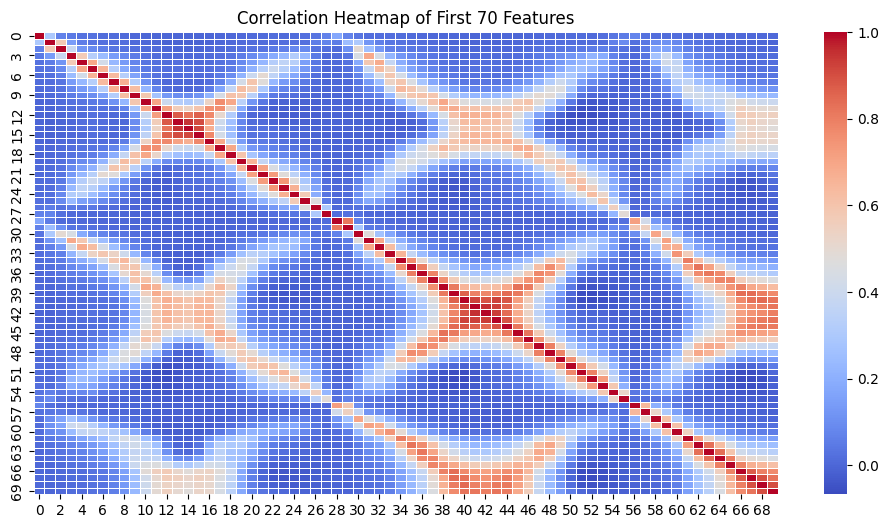

In [25]:
sample_corr = pd.DataFrame(X_train_scaled[:, :70])# male new dataframe for first 70 columns
plt.figure(figsize=(12, 6))#plotting
sns.heatmap(sample_corr.corr(), cmap='coolwarm', linewidths=0.5) #plot correltion heatmap
plt.title("Correlation Heatmap of First 70 Features")
plt.show()

**1.11 applying and visualizing PCA for further steps(clustering)**

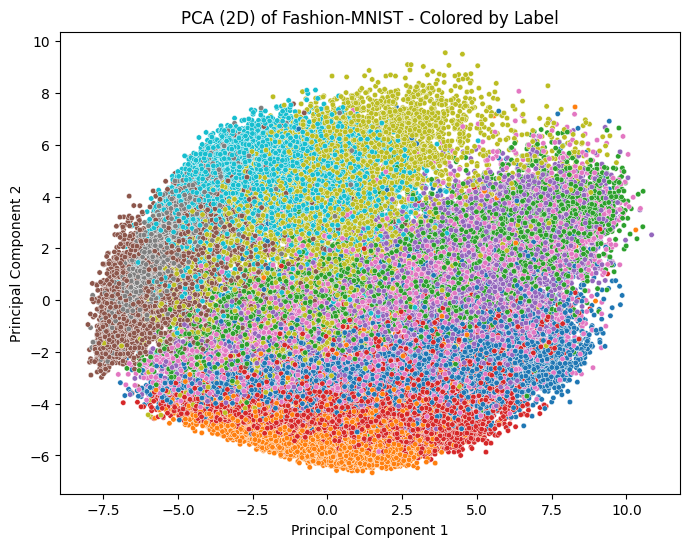

In [26]:
from sklearn.decomposition import PCA
# pca just for important features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) # fit model
# scatter plot base on the pca labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="tab10", s=15, legend=False) #color diffrent by ytrain
plt.title("PCA (2D) of Fashion-MNIST - Colored by Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**1.12 t-SNE Visualization for Dimensionality Reduction**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completed in 6.70 seconds


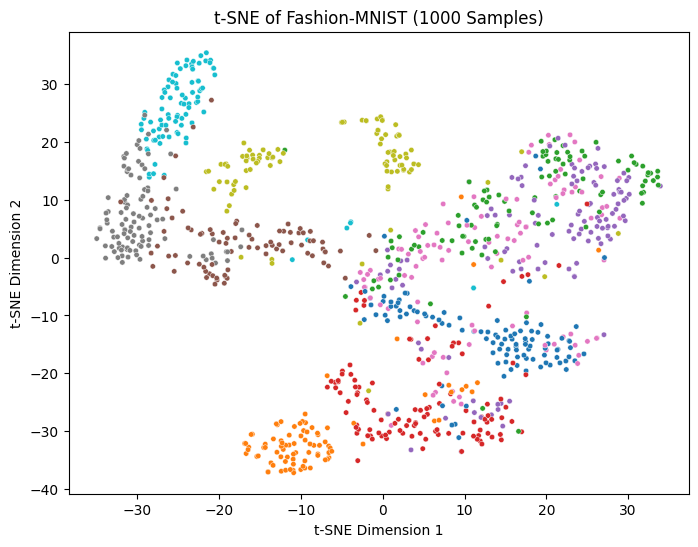

In [30]:
from sklearn.manifold import TSNE
import time
# reduce dimensionality with t-SNE for better visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)  # define t-SNE model for 1000 sample of data
start = time.time()  # start timing
X_tsne = tsne.fit_transform(X_train_scaled[:1000])  # apply t-SNE on 1000 samples (to avoid long time)
end = time.time()  # end timing
print(f"t-SNE completed in {end - start:.2f} seconds")  # print timming
# Plotting the result
plt.figure(figsize=(8, 6))  # set plot size
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train[:1000], palette="tab10", s=15, legend=False)  # 2D scatter # color tab10
plt.title("t-SNE of Fashion-MNIST (1000 Samples)")  # title
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()  # show

# **Task 1 for implementation MLP**

**1.1MLP Classifier with30,15,20 hidden layer**

In [33]:
from sklearn.neural_network import MLPClassifier  # For training MLP model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation

**Define the MLP with 3 hidden layer model**

In [34]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(30, 15, 20),  # 3 hidden layers with 30, 15, 20 neurons
    max_iter=100,                    # Maximum number of iterations
    random_state=42                  # For reproducibility
)

**1.2Train and fit the model**

In [35]:
mlp_model.fit(X_train_scaled, y_train)  # Train model on scaled training data

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=100, random_state=42)

1.3 Make predictions on test set

In [36]:
y_test_pred = mlp_model.predict(X_test_scaled)  # Predict labels for test data

1.4 Evaluate the MLP model

In [37]:
mlp_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate accuracy
mlp_report = classification_report(y_test, y_test_pred)  # Classification report
mlp_conf_matrix = confusion_matrix(y_test, y_test_pred)  # Confusion matrix

In [38]:
print(" MLP Classifier Accuracy on Test Set:", mlp_accuracy)
print("\n Classification Report:\n", mlp_report)
print("\n Confusion Matrix:\n", mlp_conf_matrix)

 MLP Classifier Accuracy on Test Set: 0.8763

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.97      0.98      0.98      1000
           2       0.79      0.80      0.79      1000
           3       0.91      0.87      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.97      0.93      0.95      1000
           6       0.70      0.69      0.70      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.95      0.96      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


 Confusion Matrix:
 [[823   4  19  20   0   3 124   0   7   0]
 [  2 982   5   9   1   1   0   0   0   0]
 [ 13   2 795  11 102   1  74   0   2   0]
 [ 27  17  13 868  4

**2.1 Extra AI method Gridsearch for MPL classifier (choose best hyper parameter)**

Hypertuning method for MLP

In [46]:
from sklearn.model_selection import GridSearchCV #import library gridsearch

**2.2 creat and define model and parameters for mlp**

In [47]:
# Define base model with fewer max_iter for quick testing
mlp = MLPClassifier(max_iter=100, random_state=42)
# Reduced parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32)],  # simpler and deeper
    'activation': ['relu'],  # best default
    'solver': ['adam'],  # commonly used for MLP
    'learning_rate': ['constant', 'adaptive'],  # 2 options
    'alpha': [0.0001]  # regularization strength
}

**2.3 creat Gridesearch algorithm**

In [49]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,cv=3, scoring='accuracy', n_jobs=-1)
#all the cpu

**2.4 fit and train Grid search**

In [50]:
# Fit on training data
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(64,), (64, 32)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']},
             scoring='accuracy')

**2.5 best parameters for MLP y GRid search**

In [51]:
#Print best parameters and accuracy
print(" Best Parameters:", grid_search.best_params_)
print(" Best Training Accuracy:", grid_search.best_score_)

 Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'solver': 'adam'}
 Best Training Accuracy: 0.8793666666666665


**2.6 predict classification by gridsearch best params**

In [52]:
y_pred_grid = grid_search.predict(X_test_scaled)

**2.7 evaluation of greachsearch method**

In [53]:
print("Test Accuracy (Best Model by gridshearch):", accuracy_score(y_test, y_pred_grid))
print("\n Classification Report for gridsearch:\n", classification_report(y_test, y_pred_grid))
print("\n Confusion Matrix for gridsearch:\n", confusion_matrix(y_test, y_pred_grid))


Test Accuracy (Best Model by gridshearch): 0.891

 Classification Report for gridsearch:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.98      0.99      0.99      1000
           2       0.82      0.79      0.80      1000
           3       0.91      0.89      0.90      1000
           4       0.82      0.87      0.84      1000
           5       0.96      0.95      0.96      1000
           6       0.73      0.70      0.72      1000
           7       0.94      0.95      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


 Confusion Matrix for gridsearch:
 [[855   0  15  18   3   3 103   0   3   0]
 [  3 990   1   5   0   1   0   0   0   0]
 [ 11   2 786  14 102   0  82